# Импорты

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 48.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=0bbfb2aaf2fa3b78e68af0b35bed39b09a67f0b05836ba4f72e4111de76817e6
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [ ]:
!pip install natasha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26118 sha256=ef940f6bf148d71a05991780f9060a9ed52c74644f40b9095725d065a5fd0b32
  Stored in directory: /root/.cache/pip/wheels/45/23/de/5789a92962483fd33cb06674792b9697c1b3766d7c7742830e
Successfully built intervaltree


In [ ]:
!pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 75.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Lasso

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer

from gensim.models import Word2Vec

from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_news_v1_1B_250K_300d_100q.tar

--2023-03-08 12:53:52--  https://storage.yandexcloud.net/natasha-navec/packs/navec_news_v1_1B_250K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26634240 (25M) [application/x-tar]
Saving to: ‘navec_news_v1_1B_250K_300d_100q.tar’

navec_news_v1_1B_25 100%[===================>]  25.40M  9.68MB/s    in 2.6s    

2023-03-08 12:53:56 (9.68 MB/s) - ‘navec_news_v1_1B_250K_300d_100q.tar’ saved [26634240/26634240]



In [ ]:
from navec import Navec
path = 'navec_news_v1_1B_250K_300d_100q.tar'
navec = Navec.load(path)

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6]

# Загрузка данных

In [ ]:
import requests
from urllib.parse import urlencode

In [ ]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/8fgGb-yo_EX-lg'  

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Загружаем файл и сохраняем его
download_response = requests.get(download_url) 
df_test = pd.read_csv(download_url, sep=',') 

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/qt3hhcAnKQBcXA'  

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Загружаем файл и сохраняем его
download_response = requests.get(download_url) 
df_train = pd.read_csv(download_url, sep=',')

In [ ]:
df_train.head()

,name,experience,schedule,employment,description,key_skills,salary
0,Водитель-экспедитор,От 3 до 6 лет,Полный день,Полная занятость,"Водитель-экспедитор категории В,С (а\м ГАЗЕЛЬ ...",[],42500.0
1,Кладовщик-комплектовщик/оператор 1С,От 1 года до 3 лет,Полный день,Полная занятость,Обязанности: Списывание материалов в произво...,"['знание пк', 'работа в 1С', 'Работа в команде...",50000.0
2,"Продавец магазина ""Магнит"" (Кировский р-он, В....",Нет опыта,Сменный график,Полная занятость,"В крупнейшую Федеральную сеть магазинов ""Магни...",[],31500.0
3,Администратор магазина (ТЦ Spar),От 1 года до 3 лет,Полный день,Полная занятость,Крупная федеральная сеть магазинов мужской и ж...,[],36700.0
4,Мойщик посуды (кулинария),Нет опыта,Сменный график,Полная занятость,Обязанности: Уборка производственных площадей...,"['Пользователь ПК', 'Грамотная речь', 'Работа ...",37000.0


In [ ]:
df_test.head()

,id,name,experience,schedule,employment,description,key_skills
0,0,Главный бухгалтер,Более 6 лет,Полный день,Полная занятость,Обязанности:Осуществление организации бухгалте...,"['1С: Предприятие 8', '1C: Предприятие', 'Рабо..."
1,1,Ассистент врача-стоматолога,От 1 года до 3 лет,Сменный график,Полная занятость,"Обязанности: Ассистировать врачу стоматологу,...","['Пользователь ПК', 'Работа в команде', 'Умени..."
2,2,Менеджер по продажам,От 1 года до 3 лет,Полный день,Полная занятость,Если ты: хочешь построить карьеру в банковс...,[]
3,3,Менеджер,От 1 года до 3 лет,Полный день,Полная занятость,Динамично развивающаяся на протяжении 17 лет...,"['Оценка потребностей клиентов', 'оформление д..."
4,4,Администратор хостела,Нет опыта,Сменный график,Полная занятость,ВОЗМОЖНА РАБОТА С ПРОЖИВАНИЕМ Обязанности: Пр...,[]


## Заранее очищенные данные

In [ ]:
#Очищенные данные:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/GN0jQ3pJ70dU8g'   

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Загружаем файл и сохраняем его
download_response = requests.get(download_url) 
clean_train = pd.read_csv(download_url, sep=',') 

In [ ]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/o-oteKvtX-phYw'   

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Загружаем файл и сохраняем его
download_response = requests.get(download_url) 
clean_test = pd.read_csv(download_url, sep=',') 

In [ ]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/LM-R1ltfX6V4gw'   

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Загружаем файл и сохраняем его
download_response = requests.get(download_url) 
salary = pd.read_csv(download_url, sep=',') 

# EDA

В первую очередь, проверили, что в датасете нет недостающих значений. Как тренировочные, так и тестовые данные не содержат значений формата None


In [ ]:
df_train.isna().sum()

name           0
experience     0
schedule       0
employment     0
description    0
key_skills     0
salary         0
dtype: int64

In [ ]:
df_test.isna().sum()

id             0
name           0
experience     0
schedule       0
employment     0
description    0
key_skills     0
dtype: int64

Зарплаты сильно скошены в сторону низких значений

<AxesSubplot:xlabel='salary', ylabel='Count'>

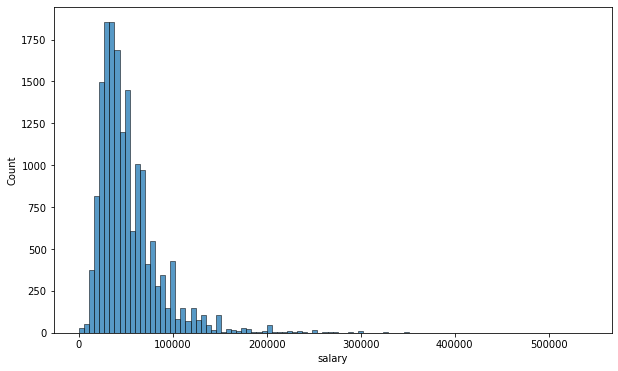

In [ ]:
sns.histplot(df_train.salary, bins=100)

Преобразуем зависимую переменную через натуральный логарифм - в таком виде выбросы будут нагляднее

Также, близость к нормальному распределению позволит проще предсказывать зависимую переменную в задаче регрессии

<AxesSubplot:xlabel='salary', ylabel='Count'>

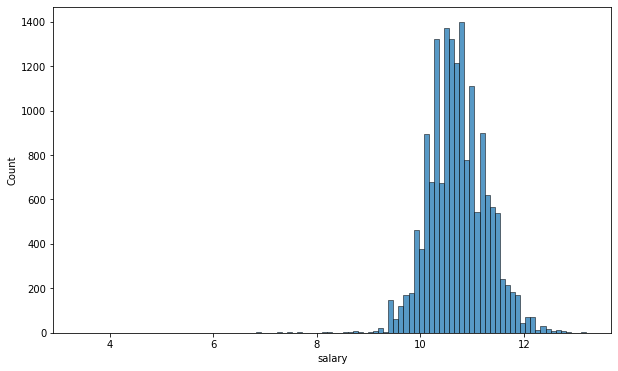

In [ ]:
sns.histplot(np.log(df_train.salary), bins=100)

**Шаг 1: удаляем выбросы**

Попытка удаления выбросов была предпринята, однако удаление сильно отклоняющихся от среднего значений не привело к улучшению результатов предсказания - напротив, fit моделей на данных без удаленных выбросов превосходит таковой для очищенных данных

In [ ]:
import numpy as np

In [ ]:
Q1 = np.percentile(np.log10(df_train.salary + 1), 25, method = 'midpoint')
Q3 = np.percentile(np.log10(df_train.salary + 1), 75, method = 'midpoint')
IQR = Q3 - Q1
upper=Q3+2*IQR
lower=Q1-2*IQR

In [ ]:
df_train['log10_salary'] = np.log10(df_train.salary + 1)

In [ ]:
df_low = df_train[df_train.log10_salary <= lower] #слишком низкая зарплата
df_high = df_train[df_train.log10_salary >= upper] #слишком высокая зарплата
df_train_no_out = df_train.loc[(df_train.log10_salary >= lower) & (df_train.log10_salary <= upper)].reset_index()

In [ ]:
print(len(df_low), len(df_high)) # всего теряем на выбросах меньше 100 наблюдений, просто отказываемся от них

37 16


In [ ]:
df_train_no_out.to_csv('sal.csv')

**Шаг 2: Работа с категориальными переменными**

Вакансий для опытных соискателей совсем немного, но они, в среднем, наиболее высокооплачиваемые

Требуемый опыт распределен между тестовым и тренировочным датасетами равномерно

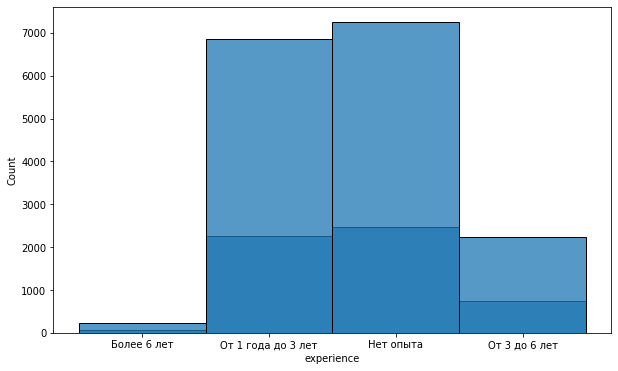

In [ ]:
sns.histplot(df_test.experience)
sns.histplot(df_train_no_out.experience)
plt.show()

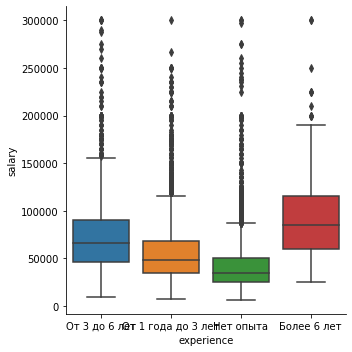

In [ ]:
sns.catplot(x='experience', y='salary',
            data=df_train_no_out,
            kind='box')

Перекодируем переменную experience следующим образом:
*   0 - нет опыта
*   1 - опыт от 1 года до 3 лет
*   2 - опыт от 3 до 6 лет
*   3 - опыт более 6 лет

In [ ]:
for i in range(len(df_train)):
  try:
     if df_train['experience'][i] == 'Нет опыта':
        df_train['experience'][i] = '0 опыт'

     elif df_train['experience'][i] == 'От 1 года до 3 лет':
         df_train['experience'][i] = '1 опыт'

     elif df_train['experience'][i] == 'От 3 до 6 лет':
         df_train['experience'][i] = '2 опыт'
     else :
         df_train['experience'][i] = '3 опыт'
  except:
    print(df_train['experience'][i])

df_train['experience_code'] = pd.factorize(df_train.experience, sort=True)[0]

In [ ]:
df_train.head()

,name,experience,schedule,employment,description,key_skills,salary,skills,joined_skills,experience_code
0,Водитель-экспедитор,2 опыт,Полный день,Полная занятость,"Водитель-экспедитор категории В,С (а\м ГАЗЕЛЬ ...",[],42500.0,[],,2
1,Кладовщик-комплектовщик/оператор 1С,1 опыт,Полный день,Полная занятость,Обязанности: Списывание материалов в произво...,"['знание пк', 'работа в 1С', 'Работа в команде...",50000.0,"[знание пк, работа в 1С, Работа в команде, Скл...",знание пк работа в 1С Работа в команде Складск...,1
2,"Продавец магазина ""Магнит"" (Кировский р-он, В....",0 опыт,Сменный график,Полная занятость,"В крупнейшую Федеральную сеть магазинов ""Магни...",[],31500.0,[],,0
3,Администратор магазина (ТЦ Spar),1 опыт,Полный день,Полная занятость,Крупная федеральная сеть магазинов мужской и ж...,[],36700.0,[],,1
4,Мойщик посуды (кулинария),0 опыт,Сменный график,Полная занятость,Обязанности: Уборка производственных площадей...,"['Пользователь ПК', 'Грамотная речь', 'Работа ...",37000.0,"[Пользователь ПК, Грамотная речь, Работа с орг...",Пользователь ПК Грамотная речь Работа с оргтех...,0


Теперь переходим к обработке расписания рабочих обязанностей

Наполненность классов различается в несколько раз - кратно превалирует занятость на полный рабочий день

In [ ]:
df_train['schedule_code'] = pd.factorize(df_train.schedule, sort=True)[0]
df_train['employment_code'] = pd.factorize(df_train.employment, sort=True)[0]

In [ ]:
df_train.head()

Полный день         11396
Сменный график       2714
Вахтовый метод       1158
Гибкий график         672
Удаленная работа      636
Name: schedule, dtype: int64

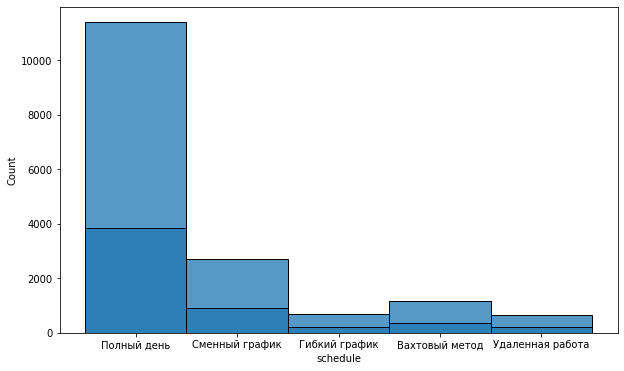

In [ ]:
sns.histplot(df_train_no_out.schedule)
sns.histplot(df_test.schedule)
df_train_no_out.schedule.value_counts()

то же самое касается формата работы

Полная занятость       15693
Частичная занятость      783
Проектная работа          66
Стажировка                34
Name: employment, dtype: int64

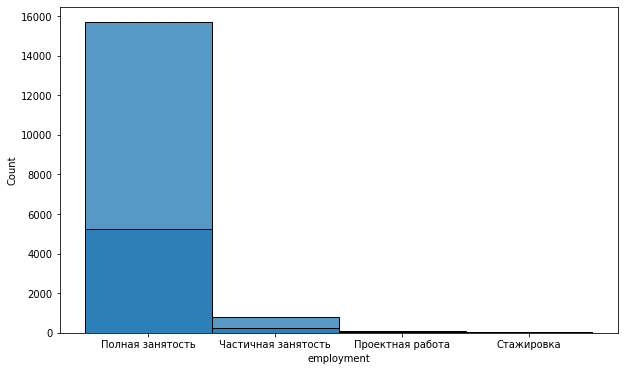

In [ ]:
sns.histplot(df_train_no_out.employment)
sns.histplot(df_test.employment)
df_train_no_out.employment.value_counts()

**Шаг 3: Работа с требуемыми навыками**


In [ ]:
from ast import literal_eval
from collections import OrderedDict

In [ ]:
skills = []
for i in tqdm(range(len(df_train))):
  a = literal_eval(df_train['key_skills'][i])
  skills.append(a)

100%|██████████| 16629/16629 [00:00<00:00, 21191.00it/s]


In [ ]:
df_train['skills'] = skills
df_train.head()

,name,experience,schedule,employment,description,key_skills,salary,skills
0,Водитель-экспедитор,От 3 до 6 лет,Полный день,Полная занятость,"Водитель-экспедитор категории В,С (а\м ГАЗЕЛЬ ...",[],42500.0,[]
1,Кладовщик-комплектовщик/оператор 1С,От 1 года до 3 лет,Полный день,Полная занятость,Обязанности: Списывание материалов в произво...,"['знание пк', 'работа в 1С', 'Работа в команде...",50000.0,"[знание пк, работа в 1С, Работа в команде, Скл..."
2,"Продавец магазина ""Магнит"" (Кировский р-он, В....",Нет опыта,Сменный график,Полная занятость,"В крупнейшую Федеральную сеть магазинов ""Магни...",[],31500.0,[]
3,Администратор магазина (ТЦ Spar),От 1 года до 3 лет,Полный день,Полная занятость,Крупная федеральная сеть магазинов мужской и ж...,[],36700.0,[]
4,Мойщик посуды (кулинария),Нет опыта,Сменный график,Полная занятость,Обязанности: Уборка производственных площадей...,"['Пользователь ПК', 'Грамотная речь', 'Работа ...",37000.0,"[Пользователь ПК, Грамотная речь, Работа с орг..."


In [ ]:
df_train.skills[1]

['знание пк',
 'работа в 1С',
 'Работа в команде',
 'Складской Учет',
 'Складской документооборот',
 '1С: Производство',
 'Организация движения и учета документов',
 'Internet',
 'Работа с ТМЦ',
 'Контроль отгрузок',
 'Ориентация на результат']

In [ ]:
skills_count = dict()

for skill_list in df_train_no_out.key_skills:
    list_of_skills = literal_eval(skill_list)
    for skill in list_of_skills:
        if skill not in skills_count:
            skills_count[skill] = 1
        else:
            skills_count[skill] += 1

skills_count = {k: v for k, v in sorted(skills_count.items(), key=lambda item: item[1], reverse=True)}
skills_count

**Шаг 4: feature engineering**

Были созданы две переменные - **длина описания вакансии** и **количество требуемых навыков**

Неожиданное наблюдение - описания вакансии становятся только короче вместе с ростом зарплаты

Стоит также отметить, что для вакансий со ставкой более 200 тыс. рублей наблюдений кратно меньше чем в диапазоне до 150 тыс. рублей.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

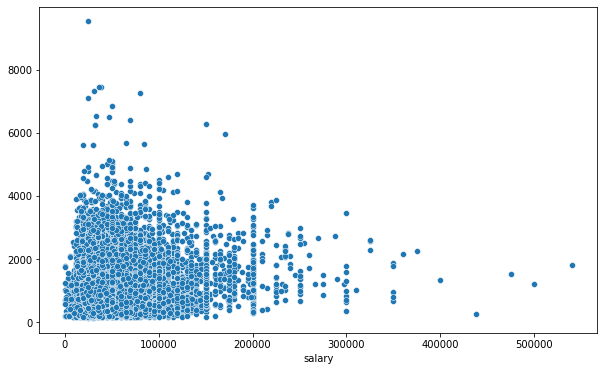

In [ ]:
lens = []
for i in df_train.description:
  lens.append(len(i))
sns.scatterplot(df_train.salary, lens)

Нечто похожее наблюдается и в отношении навыков - более высокооплачиваемые вакансии перечисляют небольшое количество навыков

Тем не менее, связь между этими признаками очень слабая, поэтому созданные переменные не будут включены в итоговую модель

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

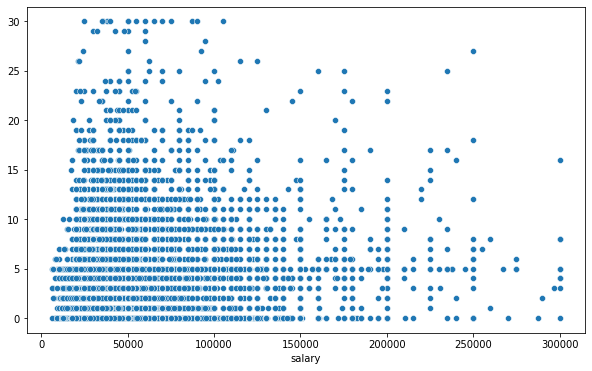

In [ ]:
lens_sk = []
for i in df_train_no_out.skills:
  lens_sk.append(len(i))
sns.scatterplot(df_train_no_out.salary, lens_sk)

# Preprocessing

In [ ]:
joined_skills = []
for i in df_train['skills']:
  joined_skills.append(' '.join(i))
df_train['joined_skills'] = joined_skills

In [ ]:
df_train['joined_skills'][1]

'знание пк работа в 1С Работа в команде Складской Учет Складской документооборот 1С: Производство Организация движения и учета документов Internet Работа с ТМЦ Контроль отгрузок Ориентация на результат'

In [ ]:
df_train_new = pd.DataFrame()
df_train_new['text'] = df_train.name + ' ' + df_train.description
df_train_new['skills'] = joined_skills
df_train_new['experience'] = df_train['experience_code']
df_train_new['schedule'] = df_train['schedule_code']
df_train_new['employment'] = df_train['employment_code']

In [ ]:
df_train_new.head()

,text,skills,experience,schedule,employment
0,Водитель-экспедитор Водитель-экспедитор катего...,,2,2,0
1,Кладовщик-комплектовщик/оператор 1С Обязанност...,знание пк работа в 1С Работа в команде Складск...,1,2,0
2,"Продавец магазина ""Магнит"" (Кировский р-он, В....",,0,3,0
3,Администратор магазина (ТЦ Spar) Крупная федер...,,1,2,0
4,Мойщик посуды (кулинария) Обязанности: Уборка...,Пользователь ПК Грамотная речь Работа с оргтех...,0,3,0


In [ ]:
#df_train_new = pd.get_dummies(df_train_new, columns = ['experience', 'schedule', 'employment'], drop_first = True)

In [ ]:
from spacy.lang.ru.stop_words import STOP_WORDS

In [ ]:
stop_words = set(stopwords.words('russian'))
STOP_WORDS.update(stop_words)
STOP_WORDS.update(['telegram', 'whats app', 'whatsapp', 'viber']) #эти слова встречаются только как указание способа связи
morph = MorphAnalyzer()

# функция для очистки описаний
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # избавляемся от ссылок
    text = re.sub('[^а-яёА-ЯЁa-zA-Z]', ' ', text) # оставляем только кириллицу и латиницу
    text = word_tokenize(text.lower()) # приводим к нижнему регистру и токенизируем по словам
    # приводим токены к нормальной форме, удаляем стоп-слова и короткие токены
    text = [morph.normal_forms(token)[0] for token in text 
            if token not in STOP_WORDS and len(token) > 2]
    text = " ".join(text) # возвращаем строку
    return text

In [ ]:
clean_text(df_train_new.text[0])

'водитель экспедитор водитель экспедитор категория газель тент газель цельнометаллический газ фургон обязанность развоз товар точка черта владимир область график доставка товар москва иваново рязань экспедирование приёмка передача товар точка разгрузка товар точка материальный ответственность транспортный средство груз товаросопроводительный документ содержание подотчётный транспортный средство технически исправный рабочий состояние мелкий текущий ремонт техобслуживание требование наличие водительский удостоверение категория спокойствие выносливость достаточный подготовка вежливость опыт текущий ремонт техобслуживание отечественный транспортный средство условие выплата заработок раз месяц отпуск раз год осень весна календарный день официальный трудоустройство соцпакет'

In [ ]:
%time df_train_new['cleaned'] = df_train_new.text.apply(clean_text)
df_train_new.head()

CPU times: user 6min 19s, sys: 1.06 s, total: 6min 20s
Wall time: 6min 25s


,text,skills,experience,schedule,employment,cleaned
0,Водитель-экспедитор Водитель-экспедитор катего...,,2,2,0,водитель экспедитор водитель экспедитор катего...
1,Кладовщик-комплектовщик/оператор 1С Обязанност...,знание работа работа команда складской учёт ск...,1,2,0,кладовщик комплектовщик оператор обязанность с...
2,"Продавец магазина ""Магнит"" (Кировский р-он, В....",,0,3,0,продавец магазин магнит кировский уса крупный ...
3,Администратор магазина (ТЦ Spar) Крупная федер...,,1,2,0,администратор магазин spar крупный федеральный...
4,Мойщик посуды (кулинария) Обязанности: Уборка...,пользователь грамотный речь работа оргтехника ...,0,3,0,мойщик посуда кулинария обязанность уборка про...


In [ ]:
df_train_new['skills'] = df_train_new['skills'].apply(clean_text)

In [ ]:
df_train_new.to_csv('clean_train1.csv')

In [ ]:
df_train_new = pd.read_csv('clean_train1.csv')

## Биграммы

In [ ]:
clean_train = df_train_new.copy()

In [ ]:
for i in range(len(clean_train)):
  if pd.isnull(clean_train.cleaned[i]) == True:
    clean_train.cleaned[i] = ''

for i in range(len(clean_train)):
  if pd.isnull(clean_train.skills[i]) == True:
    clean_train.skills[i] = ''

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)


segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

In [ ]:
def to_wordlist(sentences):
  wordlist = []
  for i in sentences:
      wordlist.append(i.split())
  return(wordlist)

In [ ]:
train_words = to_wordlist(clean_train.cleaned)

In [ ]:
train_words[:2]

In [ ]:
train_skills = to_wordlist(clean_train.skills)

In [ ]:
train_skills[1]

['знание',
 'работа',
 'работа',
 'команда',
 'складской',
 'учёт',
 'складской',
 'документооборот',
 'производство',
 'организация',
 'движение',
 'учёт',
 'документ',
 'internet',
 'работа',
 'тмц',
 'контроль',
 'отгрузка',
 'ориентация',
 'результат']

In [ ]:
bigram = Phrases(train_words, min_count=3)
trigram = Phrases(bigram[train_words], min_count=3)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
bigram_sk = Phrases(train_skills, min_count=3)
trigram_sk = Phrases(bigram[train_skills], min_count=3)

In [ ]:
for i in trigram_sk[train_skills][:5]:
  print(i)

[]
['знание', 'работа', 'работа', 'команда', 'складской_учёт', 'складской_документооборот', 'производство', 'организация_движение', 'учёт', 'документ', 'internet', 'работа', 'тмц', 'контроль_отгрузка', 'ориентация_результат']
[]
[]
['пользователь', 'грамотный_речь', 'работа', 'оргтехника', 'проведение_инвентаризация', 'аналитический_способность']


### TF-IDF

In [ ]:
def dummy_preprocessor(doc):
    return doc

def get_tf_idf_dic(vectorizer, #tf-idf vectorizer is initialized before calling the function
               trigram, #Phraser is fitted before calling the function and is passed after training
               data, 
               fit = bool):
  if fit == True: #True when transforming train data, False when transforming test data (because we should not fit it)
    X = vectorizer.fit_transform(trigram[data])
  else:
    X = vectorizer.transform(trigram[data])

  feature_names = np.array(vectorizer.get_feature_names_out())
  print('Размер матрицы X: ', X.size)

  feature_index = X.nonzero()[1]
  tfidf_scores = zip(feature_index, [X[0, x] for x in feature_index])

  tfidf_dic = {}

  for (i, s) in tfidf_scores:
    tfidf_dic[feature_names[i]] = s 

  return tfidf_dic

def get_norm_tf(tfidf_dic, max, min):
  tfidf = pd.DataFrame()
  tfidf['word'] = tfidf_dic.keys()
  tfidf['tf-idf'] = tfidf_dic.values()

  X = tfidf['tf-idf']
  tf_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
  tf_scaled = tf_std * (max - min) + min
  tfidf['norm'] = tf_scaled

  dic_tf = {}
  for i in range(len(tfidf)):
     dic_tf[tfidf['word'][i]] = tfidf['norm'][i]
  return tfidf, dic_tf

In [ ]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=dummy_preprocessor,
                                   preprocessor=dummy_preprocessor,
                                   max_df=0.9) #убираем слишком часто встречающиеся слова

In [ ]:
#TF-IDF for train data (description)
tf_train = get_tf_idf_dic(tfidf_vectorizer, 
                          trigram,
                          train_words,
                          fit = True)
tf_df_train, dic_tf_train = get_norm_tf(tf_train, max = 2, min = 0.5)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Размер матрицы X:  1067284


In [ ]:
for i in range(len(train_skills)):
  if train_skills[i] == []:
    train_skills[i] = ['нет']

In [ ]:
#TF-IDF for train data (description)
tf_sk_train = get_tf_idf_dic(tfidf_vectorizer, 
                          trigram_sk,
                          train_skills,
                          fit = True)
tf_df_sk_train, dic_tf_sk_train = get_norm_tf(tf_sk_train, max = 2, min = 0.5)

Размер матрицы X:  84693


In [ ]:
tf_df_sk_train.head()

In [ ]:
#УСРЕДНЕНИЕ СКИЛЛОВ С ДЕСКРИПШНОМ
count = 0
for (i, s) in tfidf_scores_sk:
  if tf_feature_names_sk[i] not in tfidf_dic.keys():
     tfidf_dic[tf_feature_names_sk[i]] = s 
     count +=1
  else:
    tfidf_dic[tf_feature_names_sk[i]] = np.average([tfidf_dic[tf_feature_names_sk[i]], s], weights = [2,1])

In [ ]:
tfidf.to_csv('tfidf.csv')

# Test data

## Чистим данные

In [ ]:
for i in range(len(df_test)):
  try:
     if df_test['experience'][i] == 'Нет опыта':
        df_test['experience'][i] = '0 опыт'

     elif df_test['experience'][i] == 'От 1 года до 3 лет':
         df_test['experience'][i] = '1 опыт'

     elif df_test['experience'][i] == 'От 3 до 6 лет':
         df_test['experience'][i] = '2 опыт'
     else :
         df_test['experience'][i] = '3 опыт'
  except:
    print(df_test['experience'][i])

df_test['experience_code'] = pd.factorize(df_test.experience, sort=True)[0]
df_test['schedule_code'] = pd.factorize(df_test.schedule, sort=True)[0]
df_test['employment_code'] = pd.factorize(df_test.employment, sort=True)[0]

In [ ]:
df_test['experience_code'].value_counts()

0    2460
1    2270
2     736
3      77
Name: experience_code, dtype: int64

In [ ]:
skills = []
for i in tqdm(range(len(df_test))):
  a = literal_eval(df_test['key_skills'][i])
  skills.append(a)

100%|██████████| 5543/5543 [00:00<00:00, 6640.74it/s]


In [ ]:
df_test['skills'] = skills

In [ ]:
joined_skills = []
for i in df_test['skills']:
  joined_skills.append(' '.join(i))
df_test['joined_skills'] = joined_skills

In [ ]:
df_test['joined_skills'][0]

'1С: Предприятие 8 1C: Предприятие Работа с документами длительного хранения Работать в команде Работа в коллективе'

In [ ]:
df_test_new = pd.DataFrame()
df_test_new['text'] = df_test.name + ' ' + df_test.description
df_test_new['skills'] = joined_skills
df_test_new['experience'] = df_test['experience_code']
df_test_new['schedule'] = df_test['schedule_code']
df_test_new['employment'] = df_test['employment_code']

In [ ]:
df_test_new.head(1)

In [ ]:
%time df_test_new['cleaned'] = df_test_new['text'].apply(clean_text)

CPU times: user 2min 5s, sys: 330 ms, total: 2min 6s
Wall time: 2min 8s


In [ ]:
df_test_new['skills'] = df_test_new['skills'].apply(clean_text)

In [ ]:
df_test_new.to_csv('clean_test1.csv')

In [ ]:
df_test_new = pd.read_csv('clean_test1.csv')

In [ ]:
df_test_new['experience'].value_counts()

0    2460
1    2270
2     736
3      77
Name: experience, dtype: int64

In [ ]:
clean_test = df_test_new.copy()

## Обрабатываем текст: биграммы и tf-idf

In [ ]:
for i in range(len(clean_test)):
  if pd.isnull(clean_test.cleaned[i]) == True:
    clean_test.cleaned[i] = ''

for i in range(len(clean_test)):
  if pd.isnull(clean_test.skills[i]) == True:
    clean_test.skills[i] = ''

In [ ]:
test_words = to_wordlist(clean_test.cleaned)
test_skills = to_wordlist(clean_test.skills)

In [ ]:
#TF-IDF for test data (description)
tf_test = get_tf_idf_dic(tfidf_vectorizer, 
                          trigram,
                          test_words,
                          fit = False)
tf_df_test, dic_tf_test = get_norm_tf(tf_test, max = 2, min = 0.5)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Размер матрицы X:  149296


In [ ]:
for i in range(len(test_skills)):
  if test_skills[i] == []:
    test_skills[i] = ['нет']

In [ ]:
#TF-IDF for test data (skills)
tf_sk_test = get_tf_idf_dic(tfidf_vectorizer, 
                          trigram,
                          test_skills,
                          fit = False)
tf_df_sk_test, dic_tf_sk_test = get_norm_tf(tf_sk_test, max = 2, min = 0.5)

Размер матрицы X:  23957


In [154]:
tf_df_sk_test

,word,tf-idf,norm
0,хранение,0.437774,1.700537
1,работать,0.485855,1.832394
2,работа,0.254575,1.198138
3,предприятие,0.546972,2.000000
4,команда,0.145842,0.899953
...,...,...,...
1333,zabbix,0.000000,0.500000
1334,revit,0.000000,0.500000
1335,ajax,0.000000,0.500000
1336,коучинга,0.000000,0.500000


# Word2Vec

### Модель для описания

In [ ]:
w2v_model_words = Word2Vec(sentences=list(clean_train.cleaned.str.split()),
                     size=300, window=30, workers=4, min_count=0)

In [ ]:
w2v_model_words.build_vocab(trigram[train_words], update=True)
w2v_model_words.train(trigram[train_words], total_examples=w2v_model_words.corpus_count, epochs=10)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


(11601177, 12621780)

In [155]:
w2v_model_words.wv.most_similar(positive=['продавец'], topn=10)

[('продавец_консультант', 0.7397712469100952),
 ('консультант', 0.7150602340698242),
 ('продавец_кассир', 0.641340970993042),
 ('должность_продавец', 0.6270184516906738),
 ('молл', 0.5872318148612976),
 ('кассир', 0.5828865766525269),
 ('иупаковка', 0.5793876051902771),
 ('трц', 0.5757585167884827),
 ('выкладка', 0.5661661624908447),
 ('бутик', 0.5652084946632385)]

In [156]:
w2v_vectors = w2v_model_words.wv

In [157]:
from packaging.version import VersionComparisonMethod
doc_vectors_train = []
row = 0

for doc in tqdm(trigram[train_words]): #df_train_new.cleaned.str.split()
    res = np.zeros(300)
    cnt = 0
    imp = []
 
    for word in doc:
        if w2v_vectors.__contains__(word):
            try:
              res += w2v_model_words.wv[word]*np.sqrt(dic_tf_train[word])
            except:
              res += w2v_model_words.wv[word]
            cnt += 1
    if cnt != 0:
        res /= cnt
    doc_vectors_train.append(res)

doc_vectors_train = np.array(doc_vectors_train)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
100%|██████████| 16629/16629 [00:44<00:00, 371.51it/s]


In [158]:
doc_vectors_test = []
row = 0

for doc in tqdm(trigram[test_words]):
    res = np.zeros(300)
    cnt = 0
    for word in doc:
        if w2v_vectors.__contains__(word):
            try:
              res += w2v_model_words.wv[word]*np.sqrt(dic_tf_test[word])
            except:
              res += w2v_model_words.wv[word]
            cnt += 1
    if cnt != 0:
        res /= cnt
    doc_vectors_test.append(res)

doc_vectors_test = np.array(doc_vectors_test)

100%|██████████| 5543/5543 [00:07<00:00, 739.60it/s]


### Модель для навыков

In [159]:
for i in range(len(clean_train)):
  if pd.isnull(clean_train.skills[i]) == True:
    clean_train.skills[i] = ''

for i in range(len(clean_test)):
  if pd.isnull(clean_test.skills[i]) == True:
    clean_test.skills[i] = ''

In [ ]:
clean_train.head(1)

,Unnamed: 0,text,skills,experience,schedule,employment,cleaned
0,0,Водитель-экспедитор Водитель-экспедитор катего...,,2,2,0,водитель экспедитор водитель экспедитор катего...


In [160]:
w2v_model_skills = Word2Vec(sentences=list(clean_train.skills.str.split()),
                     size=64, window=20, workers=4, min_count=0)

In [161]:
w2v_model_skills.build_vocab(trigram_sk[train_skills], update=True)
w2v_model_skills.train(trigram_sk[train_skills], total_examples=w2v_model_skills.corpus_count, epochs=10)

(610673, 910580)

In [162]:
w2v_model_skills.wv.most_similar(positive=['английский'], topn=10)

[('английский_язык', 0.9158176183700562),
 ('язык', 0.9032610654830933),
 ('испанский', 0.8072441816329956),
 ('преподаватель_английский', 0.796558141708374),
 ('средне', 0.7938220500946045),
 ('подготовка_презентация', 0.7872468829154968),
 ('письменный_перевод', 0.7849993109703064),
 ('организация_мероприятие', 0.7836333513259888),
 ('преподаватель', 0.7812851071357727),
 ('powerpoint', 0.7710280418395996)]

In [163]:
skill_vectors = w2v_model_skills.wv

In [164]:
skill_vectors_train = []
row = 0

for doc in tqdm(trigram_sk[train_skills]):
    res = np.zeros(64)
    cnt = 0
    for word in doc:
        if skill_vectors.__contains__(word):
            try:
              res += w2v_model_skills.wv[word] *np.sqrt(dic_tf_sk_train[word])
            except:
              res += w2v_model_skills.wv[word]
            cnt += 1
    if cnt != 0:
        res /= cnt
    skill_vectors_train.append(res)

skill_vectors_train = np.array(skill_vectors_train)

100%|██████████| 16629/16629 [00:01<00:00, 10297.68it/s]


In [165]:
skill_vectors_test = []
row = 0

for doc in tqdm(trigram_sk[test_skills]):
    res = np.zeros(64)
    cnt = 0
    for word in doc:
      if skill_vectors.__contains__(word):
            try:
              res += w2v_model_skills.wv[word] * np.sqrt(dic_tf_sk_test[word])
            except:
              res += w2v_model_skills.wv[word]
            cnt += 1
      if cnt != 0:
          res /= cnt
    skill_vectors_test.append(res)

skill_vectors_test = np.array(skill_vectors_test)

100%|██████████| 5543/5543 [00:00<00:00, 8432.91it/s]


In [166]:
skill_vectors_test.shape

(5543, 64)

### Cтекаю все вектора вместе

In [193]:
lg_train = clean_train.drop(['text', 'cleaned', 'skills' ], axis = 1)
lg_test = clean_test.drop(['text', 'cleaned', 'skills'], axis = 1)

In [258]:
lg_train = pd.get_dummies(lg_train, columns = ['experience', 'schedule', 'employment'], drop_first = False)
lg_test = pd.get_dummies(lg_test, columns = ['experience', 'schedule', 'employment'], drop_first = False)

In [259]:
vector_test = np.concatenate((doc_vectors_test,
                              skill_vectors_test,
                              lg_test.to_numpy()), axis=1)
vector_train = np.concatenate((doc_vectors_train,
                              skill_vectors_train,
                              lg_train.to_numpy()
                               ), axis=1)

In [196]:
vector_test.shape

(5543, 367)

In [197]:
vector_train.shape

(16629, 367)

# Fit & Predict

In [176]:
from sklearn.metrics import r2_score
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [ ]:
df_train.head()

In [181]:
df_train['target'] = np.log(df_train.salary)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(vector_train, df_train.target.astype(float), test_size = 0.2, shuffle = True)

In [263]:
model = LGBMRegressor()
model.fit(X_train, y_train)

LGBMRegressor()

In [267]:
pred = model.predict(X_test)

In [265]:
r2_score(y_test, pred)

0.500443754080726

# BertRegressor

In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from transformers import BertPreTrainedModel, BertModel
from transformers import AutoConfig, AutoTokenizer

from sklearn import metrics
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange

In [ ]:
import os

In [ ]:
# pip install transformers sentencepiece
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelForPreTraining

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def compute_metrics_for_regression(eval_pred):
    logits, labels = eval_pred
    labels = labels.reshape(-1, 1)
    
    mse = mean_squared_error(labels, logits)
    r2 = r2_score(labels, logits)

    
    return {"mse": mse, "r2": r2}

## Data

In [ ]:
for i in clean_train[clean_train['cleaned'].isnull()].index:
  clean_train['cleaned'][i] = ' '

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(clean_train.cleaned, 
                                                    salary.log10_salary.astype(float), test_size = 0.2)

In [ ]:
train_d = pd.DataFrame()
train_d['text'] = X_train
train_d['target'] = y_train

val = pd.DataFrame()
val['text'] = X_test
val['target'] = y_test

In [ ]:
## Training Dataset
train_set = Ex_Dataset(data=train_d, maxlen=MAX_LEN_TRAIN, tokenizer=tokenizer)
valid_set = Ex_Dataset(data=val, maxlen=MAX_LEN_VALID, tokenizer=tokenizer)

## Data Loaders
train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, num_workers=NUM_THREADS)
valid_loader = DataLoader(dataset=valid_set, batch_size=BATCH_SIZE, num_workers=NUM_THREADS)

# print(len(train_loader))

In [ ]:
train_loader

In [ ]:
train(model=model, 
      criterion=criterion,
      optimizer=optimizer, 
      train_loader=train_loader,
      val_loader=valid_loader,
      epochs = 10,
      device = device)

## Модель

In [ ]:
from transformers import BertPreTrainedModel, BertModel

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny")

def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

print(embed_bert_cls('привет мир', model, tokenizer).shape)

In [ ]:
class Ex_Dataset(Dataset):

    def __init__(self, data, maxlen, tokenizer): 
        #Store the contents of the file in a pandas dataframe
        self.df = data.reset_index()
        #Initialize the tokenizer for the desired transformer model
        self.tokenizer = tokenizer
        #Maximum length of the tokens list to keep all the sequences of fixed size
        self.maxlen = maxlen

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, index):    
        #Select the sentence and label at the specified index in the data frame
        excerpt = self.df.loc[index, 'text']
        try:
            target = self.df.loc[index, 'y']
        except:
            target = 0.0
        identifier = self.df.index
        #Preprocess the text to be suitable for the transformer
        tokens = self.tokenizer.tokenize(excerpt, truncation = True, padding = True) 
        tokens = ['[CLS]'] + tokens + ['[SEP]'] 
        if len(tokens) < self.maxlen:
            tokens = tokens + ['[PAD]' for _ in range(self.maxlen - len(tokens))] 
        else:
            tokens = tokens[:self.maxlen-1] + ['[SEP]'] 
        #Obtain the indices of the tokens in the BERT Vocabulary
        input_ids = self.tokenizer.convert_tokens_to_ids(tokens) 
        input_ids = torch.tensor(input_ids) 
        #Obtain the attention mask i.e a tensor containing 1s for no padded tokens and 0s for padded ones
        attention_mask = (input_ids != 0).long()
        
        target = torch.tensor(target, dtype=torch.float32)
        
        return input_ids, attention_mask, target

In [ ]:
class BertRegresser(BertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.bert = BertModel(config)
        #The output layer that takes the [CLS] representation and gives an output
        self.cls_layer1 = nn.Linear(config.hidden_size,128)
        self.relu1 = nn.ReLU()
        self.ff1 = nn.Linear(128,128)
        self.tanh1 = nn.Tanh()
        self.ff2 = nn.Linear(128,1)

    def forward(self, input_ids, attention_mask):
        #Feed the input to Bert model to obtain contextualized representations
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        #Obtain the representations of [CLS] heads
        logits = outputs.last_hidden_state[:,0,:]
        output = self.cls_layer1(logits)
        output = self.relu1(output)
        output = self.ff1(output)
        output = self.tanh1(output)
        output = self.ff2(output)
        return output

In [ ]:
from tqdm import tqdm

In [ ]:
def train(model, criterion, optimizer, train_loader, val_loader, epochs, device):
    best_acc = 0
    for epoch in trange(epochs, desc="Epoch"):
        model.train()
        train_loss = 0
        for i, (input_ids, attention_mask, target) in tqdm(enumerate(iterable=train_loader)):
            optimizer.zero_grad()  
            
            input_ids, attention_mask, target = input_ids.to(device), attention_mask.to(device), target.to(device)
            
            output = model(input_ids=input_ids, attention_mask=attention_mask)
            
            loss = criterion(output, target.type_as(output))
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        print(f"Training loss is {train_loss/len(train_loader)}")
        val_loss = evaluate(model=model, criterion=criterion, dataloader=val_loader, device=device)
        print("Epoch {} complete! Validation Loss : {}".format(epoch, val_loss))

In [ ]:
def evaluate(model, criterion, dataloader, device):
    model.eval()
    mean_acc, mean_loss, count = 0, 0, 0

    with torch.no_grad():
        for input_ids, attention_mask, target in (dataloader):
            
            input_ids, attention_mask, target = input_ids.to(device), attention_mask.to(device), target.to(device)
            output = model(input_ids, attention_mask)
            
            mean_loss += criterion(output, target.type_as(output)).item()
            count += 1
            
    return mean_loss/count

In [ ]:
def predict(model, dataloader, device):
    predicted_label = []
    actual_label = []
    with torch.no_grad():
        for input_ids, attention_mask, target in (dataloader):
            
            input_ids, attention_mask, target = input_ids.to(device), attention_mask.to(device), target.to(device)
            output = model(input_ids, attention_mask)
                        
            predicted_label += output
            actual_label += target
            
    return predicted_label

In [ ]:
MODEL_OUT_DIR = '/content/bert_regressor'
## Model Configurations
MAX_LEN_TRAIN = 512
MAX_LEN_VALID = 512
MAX_LEN_TEST = 512
BATCH_SIZE = 64
LR = 1e-3
NUM_EPOCHS = 10
NUM_THREADS = 1  ## Number of threads for collecting dataset
MODEL_NAME = 'cointegrated/rubert-tiny'

if not os.path.isdir(MODEL_OUT_DIR):
    os.makedirs(MODEL_OUT_DIR)

In [ ]:
## Configuration loaded from AutoConfig 
config = AutoConfig.from_pretrained(MODEL_NAME)
## Tokenizer loaded from AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, truncation = True, padding=True)
## Creating the model from the desired transformer model
model = BertRegresser.from_pretrained(MODEL_NAME, config=config)
for param in model.bert.parameters():
    param.requires_grad = False
## GPU or CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
## Putting model to device
model = model.to(device)
## Takes as the input the logits of the positive class and computes the binary cross-entropy 
# criterion = nn.BCEWithLogitsLoss()
criterion = nn.MSELoss()
## Optimizer
optimizer = optim.Adam(params=model.parameters(), lr=LR)

In [ ]:
train(model=model, 
      criterion=criterion,
      optimizer=optimizer, 
      train_loader=train_loader,
      val_loader=valid_loader,
      epochs = 10,
      device = device)

# Predict

In [269]:
pred = np.exp(pred)

In [271]:
predictions = pd.DataFrame({'id': clean_test.index,
                            'salary': pred})
predictions.to_csv('my_submission17.csv', index=False)

In [ ]:
predictions = pd.read_csv('my_submission13.csv', sep = ';')
predictions.to_csv('my_submission14.csv', index=False)